# King County Real Estate Valuation Engine
**Author**: Ali Nazir


**Objective:** Predict house prices using regression techniques. Several models are evaluated and compared using cross-validation to identify the best-performing approach.

---

## About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## 1. Data Acquisition & Integrity Audit
*In this section, we load the raw data and perform an initial audit to ensure the dataset is complete and clean.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

df = pd.read_csv('housing.csv')
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

Now we will check if all features have the correct data types, and if they have any missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Since we have null values in 'bedrooms', and 'bathrooms', we would have to replace these null values. The most viable option we have, is to replace these values with the mean vaule of the respective features

In [3]:
df.replace({'bathrooms': {np.nan : df['bathrooms'].mean()}}, inplace=True)
df.replace({'bedrooms': {np.nan : df['bedrooms'].mean()}}, inplace=True)

In [4]:
print('Data integrity check complete. Missing values handled')
df.head()

Data integrity check complete. Missing values handled


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. Exploratory Data Analysis (EDA)
*We analyze the key drivers of price. Beyond simple correlations, we look for trends that explain the 'Premium' associated with certain property features.*

Based on intuition, I have select three features:
 - waterfront: Usually houses that have a waterfront view, have higher prices
 - sqft_living: Usually bigger houses have higher prices
 - grade: Assuming that this grade is given by an expert, it should influence the price significantly

Since waterfront is a categorical feature, we will use a boxplot to visualize it's comparison to price.

The boxplot shows clear separation between houses without a waterfront, and those with a waterfront. The separation between the median of the two indicates strong correlation of waterfront with price

<Axes: xlabel='waterfront', ylabel='price'>

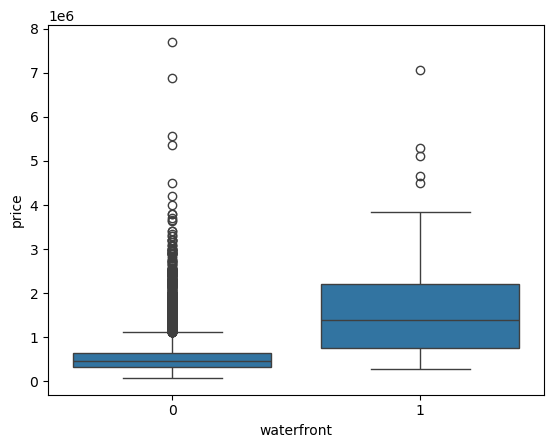

In [5]:
sns.boxplot(data=df, x='waterfront', y='price')

Now to visualize sqft_living and compare it to price, we will use a regression plot, as sqft_living is a continous feature

We can see how prices are increasing as sqft_living increases, indicating strong positive correlation

<Axes: xlabel='sqft_living', ylabel='price'>

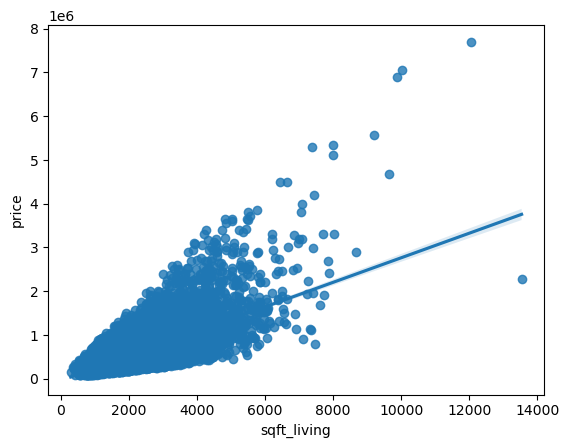

In [6]:
sns.regplot(data=df, x='sqft_living', y='price')

Let us use a bar plot to visualize the grade against the price

We can observe a strong positive correlation of grade with price. Indicating that grade is a strong predictor of price

<Axes: xlabel='grade', ylabel='price'>

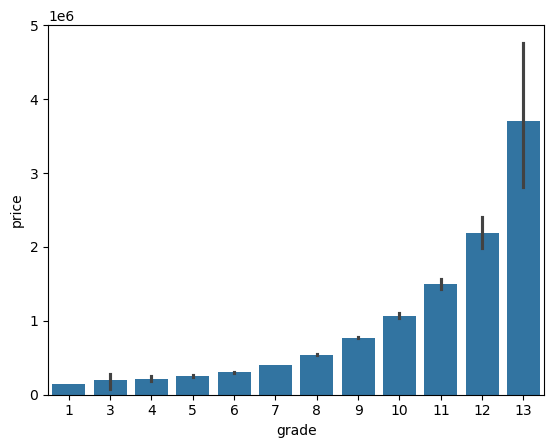

In [7]:
sns.barplot(data=df, x='grade', y='price')

Now, since I cannot decide directly what other features might be strong predictors of price. Let us find the correlations of all features with price

In [8]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## 3. Feature Engineering
*To improve model accuracy, we transform raw data into high-signal features (e.g., converting years into 'Age').*

Now let us do some experimentation. Here is what I will try now:
- I will check whether a house being renovated or not can be a predictor of price
- I will check whether the age of the house at the time of selling can be predictor of it's price
- I also know that the location of a house definitely matters when it comes to it's price

In [9]:
df['was_renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)
df['house_age'] = 2015 - df['yr_built']

Let us now visualize the impact of renovation through a boxplot

We can see that since there is not a clear separation between prices, this means that renovation does not have a significant enough impact on the price of a house

<Axes: xlabel='was_renovated', ylabel='price'>

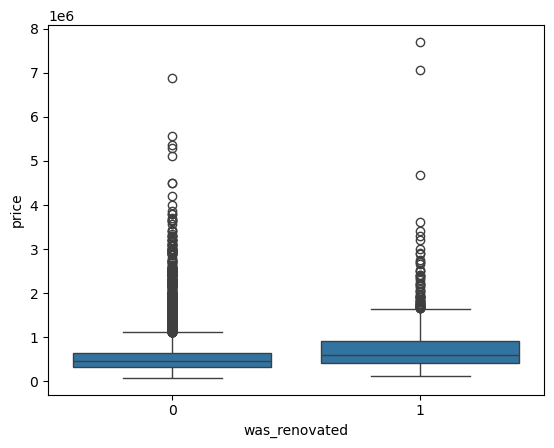

In [10]:
sns.boxplot(data=df, x='was_renovated', y='price')

Now let us visualize the impact of the age of the house through a regression plot

Surprisingly, the age of the home at the time of sale showed a weak linear correlation, suggesting that in the King County market, location and size significantly outweigh the age of the structure.

<Axes: xlabel='house_age', ylabel='price'>

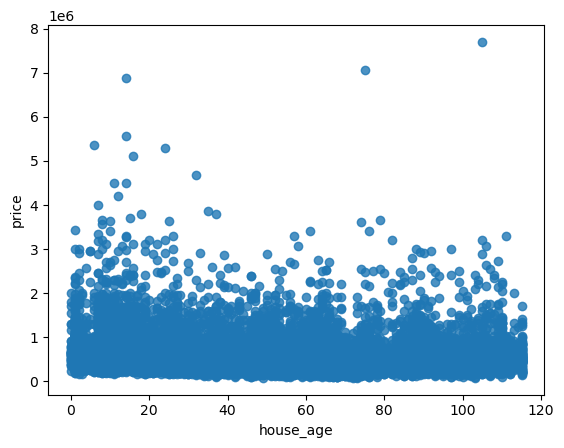

In [11]:
sns.regplot(data=df, x='house_age', y='price')

Lastly, let us find whether the location of the house has a significant impact on the price

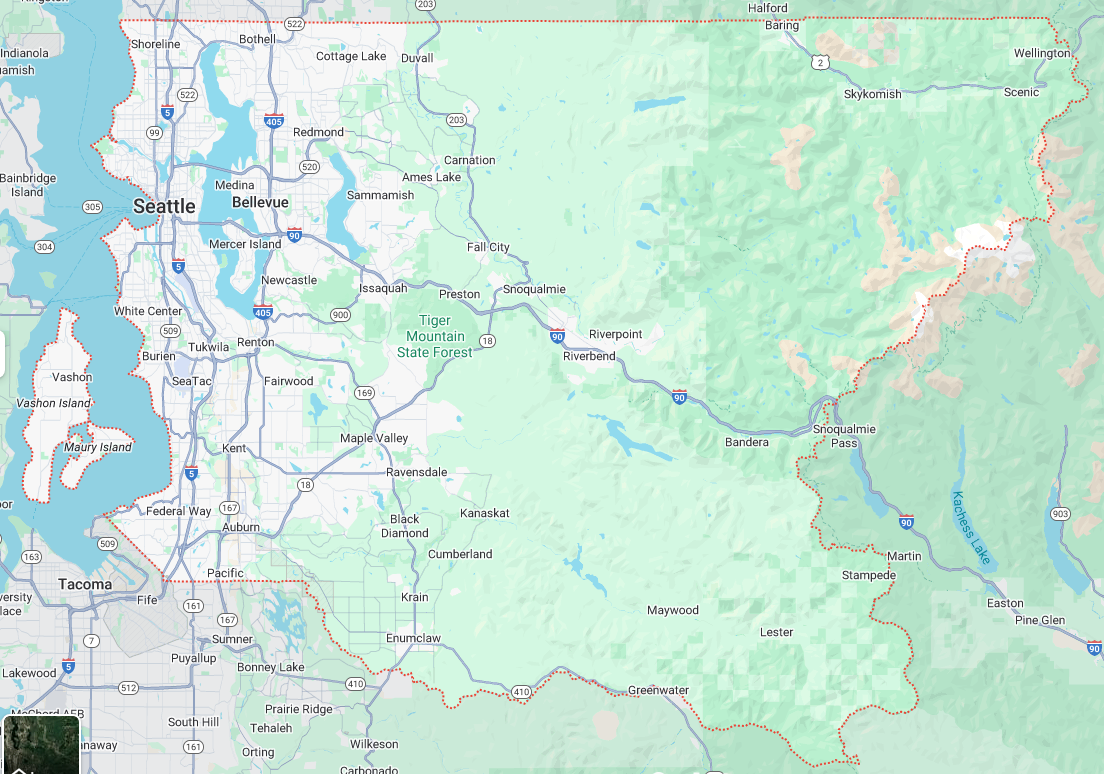

The above image shows the map of King County. We can observe that a lot of the area in the King County(highlighted by the red dotted line) is just land, which nowhere near the commercial district. Observe that as we go up towards North, we reach Seattle, and Bellevue. These are commercial districts, so rightfully the property in these areas is significantly higher, as indicated by the scatter plot below

<Axes: xlabel='long', ylabel='lat'>

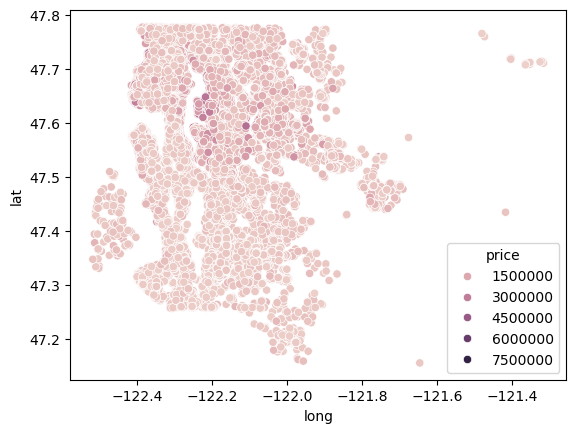

In [12]:
sns.scatterplot(data=df, x='long', y='lat', hue='price')

## 4. Model Building
*In this section, we compare four different modeling strategies to find the optimal balance between simplicity and predictive power.*

First let us choose the features that will be used for model building. We will choose features based on the insights we have gained so far.

In [13]:
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']

Now let us split data for training and testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df['price'], test_size=0.20, random_state=42)

Let us first test a **Simple Linear Regression** with the strongest predictor we have, the sqft_living feature

First we will evaluate it on training data

In [15]:
slr = LinearRegression()
slr.fit(x_train[['sqft_living']], y_train)
slr.score(x_train[['sqft_living']], y_train)

0.49238383875829517

In [16]:
slr.score(x_test[['sqft_living']], y_test)

0.49406905389089006

The **Simple Linear Regression model** using 'sqft_living' gives us an $R^{2}$ score of approximately **0.49** on both training and testing data

The similarity between these scores indicates that the model does not suffer from overfitting and generalizes well. However this only explain about **49%** of **variance in house prices** based on sqft_living

Since house prices are influenced by many features other than sqft_living we need to extend to **Multiple Linear Regression** in the next step to improve predictive performance

In [17]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.score(x_train, y_train)

0.6564450189198036

In [18]:
mlr.score(x_test, y_test)

0.6614029431732622

The **Multiple Linear Regression model** using the selected features gives us an $R^{2}$ score of approximately **0.66** on both training and testing data

The similarity between these scores indicates that the model does not suffer from overfitting and generalizes well. However this only explain about **66%** of variance in house prices, suggesting that there is still unexplained variability

To potentially improve performance, we next explore a more flexible Polynomial Regression model. The reason for trying out Polynomial Regression, is that Simple and Multi Linear Regression captures only linear relationships, but in a dataset there can be **non-linear relationships** present. So **Polynomial Regression** will capture these relationships better than the previous two

In [19]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
pipe.score(x_train, y_train)

0.7571973911855827

In [20]:
pipe.score(x_test, y_test)

0.711164048190817

The **Polynomial Regression** improves performance by giving $R^{2}$ score of approximately **0.75** on training data and **0.71** on test data.

Compared to Multiple Linear Regression, Polynomial Regression explains a greater proportion of variance in house prices, capturing non-linear relationships among features.

Although there is a mild gap between training and testing data. The higher training score indicates that there is mild overfitting and acceptable generalization. This highlights the trade-off between model complexity and generalization performance.

**Polynomial Regression** improves accuracy but also increases the risk of overfitting. To handle this, **Ridge Regression** is used, which limits how large the model’s coefficients can grow. This helps reduce overfitting and allows the model to generalize better.

In [21]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Ridge(alpha=0.1))]
pipe_ridge = Pipeline(Input)
pipe_ridge.fit(x_train, y_train)
pipe_ridge.score(x_train, y_train)

0.7571973911700222

In [22]:
pipe_ridge.score(x_test, y_test)

0.7111636479597743

Since increasing the degree of polynomial would lead to greater overfitting, and worse generalization performance, we will now keep this as our final model for this project

## 5. Model Evaluation & Business Impact

In this section we will now evaluate the performance of our model, shifting focus from $R^{2}$ score, to other metrics

First let us find the **Mean Absolute Error**, which will show us how far, on average, our model's guesses are from the actual outcomes

In [23]:
from sklearn.metrics import mean_absolute_error
yhat = pipe_ridge.predict(x_test)
mean_absolute_error(y_test, yhat)

119483.55013709354

The value of **Mean Absolute Error** above, shows us that our model predicts the prices of houses on average within approximately $120K of the actual price

After testing the predictions on the dashboard, I have come back to this step, so that we can estimate the MAE for standard and luxury homes separately

In [33]:
yhat2 = pipe_ridge.predict(x_test)

standard_mask = y_test < 1000000
luxury_mask = y_test >= 1000000

mae_standard = mean_absolute_error(y_test[standard_mask], yhat2[standard_mask])
mae_luxury = mean_absolute_error(y_test[luxury_mask], yhat2[luxury_mask])

print(f"MAE for Homes under $1M: ${mae_standard:,.2f}")
print(f"MAE for Luxury Homes ($1M+): ${mae_luxury:,.2f}")

MAE for Homes under $1M: $93,859.71
MAE for Luxury Homes ($1M+): $433,650.72


This tels us that for standard homes our error (${$94K}$) is aprroximately 22% lower than the global average (${$120K}$), while the error ofr luxury houses (${$434K}$) is 360% higher.

This solidifies our standing that our model is very reliable for predicting prices of standard , but it struggle with predicting luxury houses

Now let us visualize a plot of **Actual Prices vs Predicted Prices**

Text(0, 0.5, 'Predicted Prices')

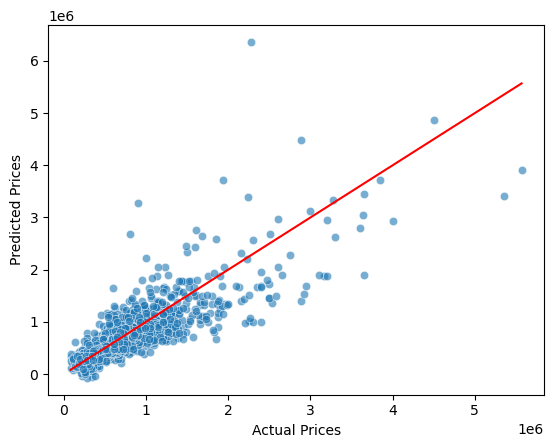

In [24]:
sns.scatterplot(x=y_test, y=yhat, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

As shown in the plot, most predictions lie close to the ideal diagonal line, indicating that the model performs well for a large portion of the dataset. This is especially true for low to mid-priced houses, which make up the majority of the data.

For higher-priced houses, the predictions tend to deviate more from the ideal line, suggesting reduced accuracy in this range. This behavior is likely due to the smaller number of high-priced examples available during training, which limits the model’s ability to learn their patterns effectively. As a result, the model generalizes less accurately for these high-value properties.

Now let us check the **Residual plot**, so that we can determine whether our selected model was approapriate for predicting the price of the houses or not

Text(0, 0.5, 'Residual (Actual - Predicted)')

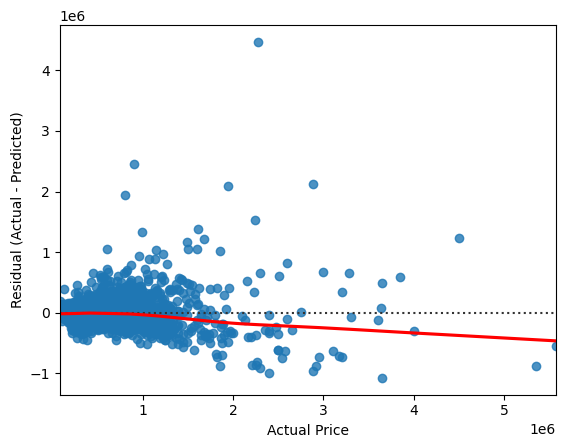

In [25]:
sns.residplot(x=y_test, y=yhat, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Actual Price')
plt.ylabel('Residual (Actual - Predicted)')

The residual plot shows that predictions for **low- to mid-range** properties are generally **concentrated around the zero baseline**, indicating **reasonably accurate and stable performance** in this range.

For **higher-priced properties**, a noticeable downward drift in the residuals can be observed, suggesting that the **model tends to overestimate the prices of luxury homes**. This pattern indicates **reduced reliability at the upper end of the price range**, likely due to fewer high-value examples and more complex factors influencing their prices.

As the final part of our evaluation, and to obtain a more robust estimate of model performance, let us try **K-folds Cross Validation**. 

This approach evaluates the model on multiple train–validation splits and reports the average performance, reducing dependence on a single split of the data.

In [26]:
from sklearn.model_selection import cross_val_score
r2_results = cross_val_score(pipe_ridge, df[features], df['price'], cv=5, scoring='r2')
r2_results

array([0.75793033, 0.7392782 , 0.71418899, 0.70420159, 0.73736545])

In [27]:
r2_results.mean()

np.float64(0.7305929120578818)

The cross-validation results show R² scores ranging from approximately 0.70 to 0.76 across the folds, with an average performance of around 0.73. This indicates that the model consistently explains about 70–75% of the variance in house prices across different subsets of the data. The relatively small variation between folds suggests that the model generalizes well and its performance is stable rather than dependent on a particular train–test split.

Let us make a summary table for **model comparison** for all the models we have used so far

In [28]:
slr_r2_result = cross_val_score(slr, df[['sqft_living']], df['price'], cv=5, scoring='r2').mean()
mlr_r2_result = cross_val_score(mlr, df[features], df['price'], cv=5, scoring='r2').mean()
poly_r2_result = cross_val_score(pipe, df[features], df['price'], cv=5, scoring='r2').mean()

r2_model_results = {
    'Model' : ['Simple', 'Multiple', 'Polynomial', 'Ridge'],
    'CV R2 (avg)': [slr_r2_result, mlr_r2_result, poly_r2_result, r2_results.mean()]
}
pd.DataFrame(r2_model_results)

,Model,CV R2 (avg)
0,Simple,0.491086
1,Multiple,0.654098
2,Polynomial,0.730593
3,Ridge,0.730593


We observe that the performace of Polynomial and Ridge Regression is identical. This means the regularization was not strong enough to noticeably change the model.

Let us try different values of alpha

In [29]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

r2_alpha_results = {
    'Alpha' : [],
    'CV R2 (avg)' : []
}
for alpha in alphas:
    Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Ridge(alpha=alpha))]
    pipe_ridge_for_alpha = Pipeline(Input)
    r2_result_for_alpha = cross_val_score(pipe_ridge_for_alpha, df[features], df['price'], cv=5, scoring='r2').mean()
    r2_alpha_results['Alpha'].append(alpha)
    r2_alpha_results['CV R2 (avg)'].append(r2_result_for_alpha)

pd.DataFrame(r2_alpha_results)

,Alpha,CV R2 (avg)
0,0.001,0.730593
1,0.010,0.730593
2,0.100,0.730593
3,1.000,0.730596
4,10.000,0.730631
5,100.000,0.730950


From the cross-validation results, we can see that the R² scores remain almost the same for all values of α. This shows that changing the regularization strength does not have a significant impact on model performance. In other words, Ridge regression does not noticeably improve or worsen the model for this dataset. This suggests that the polynomial model is already reasonably well-regularized, and further tuning of α does not lead to meaningful performance gains.

Now let us try different polynomial degrees against each alpha value

In [30]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4]

r2_alpha_results = {
    'Alpha' : [],
    'Degree': [],
    'CV R2 (avg)' : []
}
for alpha in alphas:
    for degree in degrees:
        Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=degree, include_bias=False)), ('model', Ridge(alpha=alpha))]
        pipe_ridge_for_alpha = Pipeline(Input)
        r2_result_for_alpha = cross_val_score(pipe_ridge_for_alpha, df[features], df['price'], cv=5, scoring='r2').mean()
        r2_alpha_results['Alpha'].append(alpha)
        r2_alpha_results['Degree'].append(degree)
        r2_alpha_results['CV R2 (avg)'].append(r2_result_for_alpha)

In [31]:
pd.DataFrame(r2_alpha_results).sort_values(by='CV R2 (avg)', ascending=False)

,Alpha,Degree,CV R2 (avg)
15,100.000,2,0.730950
12,10.000,2,0.730631
9,1.000,2,0.730596
6,0.100,2,0.730593
3,0.010,2,0.730593
0,0.001,2,0.730593
16,100.000,3,0.451089
13,10.000,3,0.380255
10,1.000,3,0.371104
7,0.100,3,0.370165


Increasing the polynomial degree does not improve cross-validated performance and instead slightly reduces it, indicating diminishing returns from added model complexity. This suggests that higher-degree models may be more prone to overfitting. Therefore, a polynomial degree of 2 with α = 0.1 is selected as the final model.

## 6. Model Comparison Summary
Several regression models were evaluated to predict house prices, starting from simple linear regression and progressing to more complex approaches such as multiple linear regression, polynomial regression, and Ridge regression. Model performance was assessed using cross-validation and the R² metric.

The results show that polynomial regression with degree 2 provides a noticeable improvement over linear models. Adding Ridge regularization helps control model complexity, although changes in the regularization parameter did not lead to large differences in performance.

## 7. Final Model Selection
Based on cross-validation results, the polynomial regression model with degree 2 and Ridge regularization (α = 0.1) was selected as the final model. This model achieved the highest average R² score while maintaining stable performance across validation folds. It provides a good balance between model complexity and generalization ability.

## 8. Model Performance Summary
The final model explains approximately 73% of the variance in house prices, indicating reasonably strong predictive performance. The model performs well for low- to mid-priced properties, which make up most of the dataset. Based on the Mean Absolute Error (MAE), the model predicts house prices within an average error of approximately $120,000. Prediction accuracy decreases for very high-priced houses, likely due to their smaller representation in the dataset.

## 9. Residual Analysis Interpretation
Residual analysis shows that most prediction errors are centered around zero, suggesting that the model does not suffer from strong systematic bias. However, for higher-priced homes, residuals tend to be larger and more negative, indicating that the model sometimes overestimates prices in this range. This suggests that the model struggles to fully capture patterns associated with luxury properties.

## 10. Cross-Validation Insights
Cross-validation was used to evaluate model stability and generalization. The R² scores across folds were consistent, indicating that the model performs reliably on unseen data. Testing multiple values of the regularization parameter showed minimal variation in performance, suggesting that the model is already well-regularized.

## 11. Limitations of the Model
Despite reasonable performance, the model has several limitations. First, it assumes smooth polynomial relationships between features and price, which may not fully represent real-world housing dynamics. Second, the dataset is skewed toward low- and mid-priced homes, making it harder for the model to learn patterns for high-value properties. Additionally, location effects and complex feature interactions may not be fully captured.

## 12. Final Conclusion
This project demonstrates a complete end-to-end regression workflow, from data preprocessing and feature selection to model training, evaluation, and comparison. By systematically increasing model complexity and using cross-validation, an effective and interpretable model was selected. While there is room for improvement, the final model provides a strong baseline for predicting house prices and highlights key principles of supervised learning and model evaluation.

Now finally let us download this model, so that we can make it available to real world users through a dashboard

In [32]:
import joblib
joblib.dump(pipe_ridge, 'house_predicition_model.pkl')

['house_predicition_model.pkl']